# We are studing how parallel workflows can be implemented in LangGraph

In [48]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [49]:
class BatsmanState(TypedDict):
    runs : int
    balls : int
    fours : int
    sixes : int

    sr : float
    bpb : float
    boundry_percentage : float
    summary : str

In [ ]:
#functions
#1.strike rate(100 balls how many runs)
def calculate_sr(state: BatsmanState):
    sr = (state['runs']/state['balls'])*100

    return {'sr' : sr}

#2. balls per boundry
def calculate_bpb(state:BatsmanState):
    bpb = state['balls']/(state['fours']+ state['sixes'])

    return {'bpb' : bpb}

def calculate_boundry_percentage(state:BatsmanState):
    boundry_percentage = ((state['fours']*4 + state['sixes']*6)/state['runs'])*100

    return {'boundry_percentage' : boundry_percentage}



#3. Summary
def summary(state:BatsmanState):
    summary = f"""
        Strike Rate - {state['sr']}\n
        Balls per boundry - {state['bpb']}\n
        Boundry Percentage - {state['boundry_percentage']}
        """
    return {'summary' : summary}



In [51]:
#Nodes
graph = StateGraph(BatsmanState)
graph.add_node('calculate_sr', calculate_sr)
graph.add_node('calculate_bpb', calculate_bpb)
graph.add_node('calculate_boundry_percentage', calculate_boundry_percentage)
graph.add_node('summary', summary)



In [52]:
#Edegs
graph.add_edge(START,'calculate_sr')
graph.add_edge(START,'calculate_bpb')
graph.add_edge(START,'calculate_boundry_percentage')

graph.add_edge('calculate_sr', 'summary')
graph.add_edge('calculate_bpb', 'summary')
graph.add_edge('calculate_boundry_percentage', 'summary')

graph.add_edge('summary', END)

workflow = graph.compile()


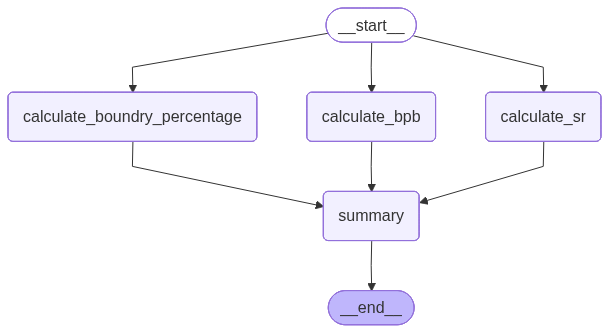

In [53]:
workflow

In [54]:
intial_state = {
    'runs' : 100,
    'balls':50,
    'fours':6,
    'sixes':4
}

In [55]:
workflow.invoke(intial_state)

KeyError: 'bp'